<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/analysis_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

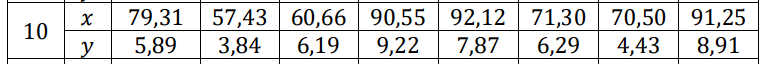

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
# dataset = pd.DataFrame({"x": [79.31, 57.43, 60.66, 90.55, 92.12, 71.30, 70.50, 91.25], "y": [5.89, 3.84, 6.19, 9.22, 7.87, 6.29, 4.43, 8.91]})

In [66]:
# dataset.T

In [67]:
# X = dataset["x"].values.reshape(-1, 1)
# y = dataset["y"].values
# X

In [68]:
# X = np.array([1.20, 1.57, 1.94, 2.31, 2.68, 3.05, 3.42, 3.79]).reshape(-1, 1)
# y = np.array([2.56, 2.06, 1.58, 1.25, 0.91, 0.66, 0.38, 0.21])
# X
# X = np.array([79.31, 57.43, 60.66, 90.55, 92.12, 71.30, 70.50, 91.25]).reshape(-1, 1)
# y = np.array([5.89, 3.84, 6.19, 9.22, 7.87, 6.29, 4.43, 8.91])
# X
X = np.array([2.56, 2.06, 1.58, 1.25, 0.91, 0.66, 0.38, 0.21]).reshape(-1, 1)
y = np.array([0.63, 1.11, 1.42, 1.96, 2.3, 2.89, 3.29, 3.87 ])
X

array([[2.56],
       [2.06],
       [1.58],
       [1.25],
       [0.91],
       [0.66],
       [0.38],
       [0.21]])

## Linear Regression y = a + bx

In [69]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred_linear = linear_regressor.predict(X)
y_pred_linear_error = mean_squared_error(y, y_pred_linear)
y_pred_linear_error

0.046369465856647016

In [70]:
print(f"y = {linear_regressor.coef_[0]} * X + {linear_regressor.intercept_}")

y = -1.3285381077443372 * X + 3.779656401927885


## Polynomial Regression y = a + b1*x + b2*x^2 + e

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred_polynomial = lin_reg_2.predict(X_poly)
y_pred_polynomial_error = mean_squared_error(y, y_pred_polynomial)
y_pred_polynomial_error

0.00770265569315855

In [72]:
feature_names = poly_reg.get_feature_names_out()

# Формируем уравнение
equation = f"{lin_reg_2.intercept_:.4f}"  # Свободный член

for coef, feature in zip(lin_reg_2.coef_, feature_names):
    equation += f" + ({coef:.4f}) * {feature}"
print("y =", equation)

y = 4.2393 + (0.0000) * 1 + (-2.3496) * x0 + (0.3762) * x0^2


## Logarithmic regression y = a + b*ln(x)

In [73]:
x_log = np.log(X)
log_regressor = LinearRegression()
log_regressor.fit(x_log, y)
y_pred_log = log_regressor.predict(x_log)
y_pred_log_error = mean_squared_error(y, y_pred_log)
y_pred_log_error

0.028287082606572575

In [74]:
print(f"y = {log_regressor.intercept_} + {log_regressor.coef_[0]}*ln(x)")

y = 2.0719115273479454 + -1.287763895946288*ln(x)


## Stepwise regression y = a * x^n
## ln(y) = ln(a) + m * ln(x)


In [75]:
x_log_stepwise = np.log(X)
y_log_stepwise = np.log(y)
stepwise_regressor = LinearRegression()
stepwise_regressor.fit(x_log_stepwise, y_log_stepwise)
y_pred_stepwise = np.exp(stepwise_regressor.predict(x_log_stepwise))
y_pred_stepwise_error = mean_squared_error(y, y_pred_stepwise)
y_pred_stepwise_error

0.24929359223101022

In [76]:
beta_0 = stepwise_regressor.intercept_
beta_1 = stepwise_regressor.coef_[0]
scale_factor = np.exp(beta_0)

print(f"e^{beta_0} + x^{beta_1} ")

e^0.5809707095486598 + x^-0.6569998839347532 


## Exponential Regression ln(y) = A * x + B

In [77]:
expon_regressor = LinearRegression()
expon_regressor.fit(X, np.log(y))
y_pred_exp = np.exp(expon_regressor.predict(X))
y_pred_exp_error = mean_squared_error(y, y_pred_exp)
y_pred_exp_error

0.009317227155926203

In [78]:
print(f"e^ (x * {expon_regressor.coef_} +({expon_regressor.intercept_})) ")

e^ (x * [-0.736516] +(1.5227690493550854)) 


## Hyperbolic Regression y = a / x + b, y = u * x + b, u = 1/a

In [79]:
x_inverted = 1/X
hyperbolic_regressor = LinearRegression()
hyperbolic_regressor.fit(x_inverted, y)
y_pred_hyper = hyperbolic_regressor.predict(x_inverted)
y_pred_hyper_error = mean_squared_error(y, y_pred_hyper)
y_pred_hyper_error

0.2378422270211646

In [80]:
print(f"{hyperbolic_regressor.coef_[0]}/x +{hyperbolic_regressor.intercept_}) ")

0.6645834038857055/x +1.1605815150128933) 


In [81]:
mse_errors={
    "Linear": y_pred_linear_error,
    "Squared": y_pred_polynomial_error,
    "Logarithmic": y_pred_log_error,
    "Stepwise": y_pred_stepwise_error,
    "Exponentian": y_pred_exp_error,
    "Hyperbolic": y_pred_hyper_error
    }
mse_errors

{'Linear': 0.046369465856647016,
 'Squared': 0.00770265569315855,
 'Logarithmic': 0.028287082606572575,
 'Stepwise': 0.24929359223101022,
 'Exponentian': 0.009317227155926203,
 'Hyperbolic': 0.2378422270211646}

In [82]:
best_model = min(mse_errors, key=mse_errors.get)
best_mse = mse_errors[best_model]

print(f"Best model: {best_model} with MSE = {best_mse:.4f}")

Best model: Squared with MSE = 0.0077


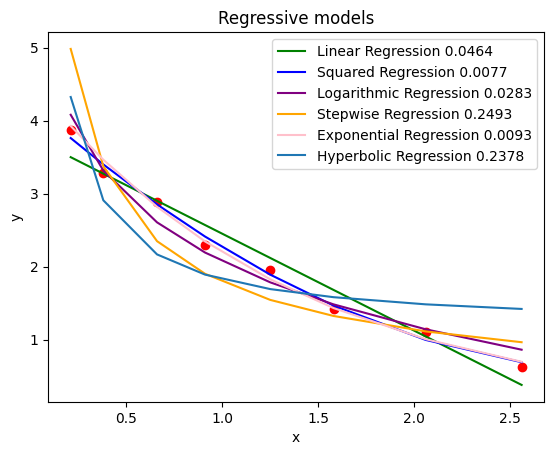

In [83]:
plt.scatter(X, y, color="red")
plt.plot(X, y_pred_linear, label=f"Linear Regression {y_pred_linear_error:.4f}", color="green")
plt.plot(X, y_pred_polynomial, label=f"Squared Regression {y_pred_polynomial_error:.4f}", color="blue")
plt.plot(X, y_pred_log, label=f"Logarithmic Regression {y_pred_log_error:.4f}", color="purple")
plt.plot(X, y_pred_stepwise, label=f"Stepwise Regression {y_pred_stepwise_error:.4f}", color="orange")
plt.plot(X, y_pred_exp, label=f"Exponential Regression {y_pred_exp_error:.4f}", color="pink")
plt.plot(X, y_pred_hyper, label=f"Hyperbolic Regression {y_pred_hyper_error:.4f}", )
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressive models')
plt.show()